In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import os
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_excel('ded_df.xlsx', dtype = {'sleep_quality': str, 'stress_level': str}).iloc[:,1:]

# Random Forest

In [68]:
# Drop first category of categorical variables
df_dummify = pd.get_dummies(df, drop_first = True)

# Split df_dummify into X and y
X, y = df_dummify.iloc[:,:-1], df_dummify.loc[:,'dry_eye_disease_Y']

# Split X and y into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 30) 

In [84]:
# Setting parameters for a grid search
max_depth = np.arange(4,8,1)

n_estimators = np.arange(100,225,25)

max_features = ['sqrt', 'log2',None]

parameters = {'max_depth' : max_depth, 'n_estimators': n_estimators, 'max_features': max_features}

In [86]:
# random forest model
RF_Grid = RandomForestClassifier(random_state = 2000, oob_score = True, max_samples = 0.667)
RF_Grid

# Grid search object 
GS_CV_RF = GridSearchCV(RF_Grid, parameters).fit(X_train, y_train)
GS_CV_RF

GridSearchCV(estimator=RandomForestClassifier(max_samples=0.667, oob_score=True,
                                              random_state=2000),
             param_grid={'max_depth': array([4, 5, 6, 7]),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([100, 125, 150, 175, 200])})

In [90]:
yhat_grid = GS_CV_RF.best_estimator_.predict(X_test)

In [126]:
GS_CV_RF.best_estimator_

RandomForestClassifier(max_depth=4, max_features=None, max_samples=0.667,
                       oob_score=True, random_state=2000)

In [103]:
GS_CV_RF.best_params_

{'max_depth': 4, 'max_features': None, 'n_estimators': 100}

In [115]:
cv_results = GS_CV_RF.cv_results_

In [92]:
cv_rf_grid = cross_validate(GS_CV_RF.best_estimator_, X_test, y_test, cv = 3,
              scoring = ('accuracy', 'recall', 'f1'))
cv_rf_grid

{'fit_time': array([3.53238702, 2.88036585, 2.91574407]),
 'score_time': array([0.11275792, 0.09975696, 0.19126654]),
 'test_accuracy': array([0.70614693, 0.68942236, 0.71717929]),
 'test_recall': array([0.92980437, 0.9424626 , 0.94585253]),
 'test_f1': array([0.80478088, 0.79824561, 0.8132739 ])}

In [94]:
# cross validate test set with metrics accuracy, recall and f1
accuracy_score = np.mean(cv_rf_grid['test_accuracy'])
recall_score = np.mean(cv_rf_grid['test_recall'])
f1_score = np.mean(cv_rf_grid['test_f1'])
print("accuracy is {}".format(accuracy_score))
print("recall is {}".format(recall_score))
print("f1 score is {}".format(f1_score))

accuracy is 0.7042495256497782
recall is 0.9393731693650027
f1 score is 0.8054334628328012


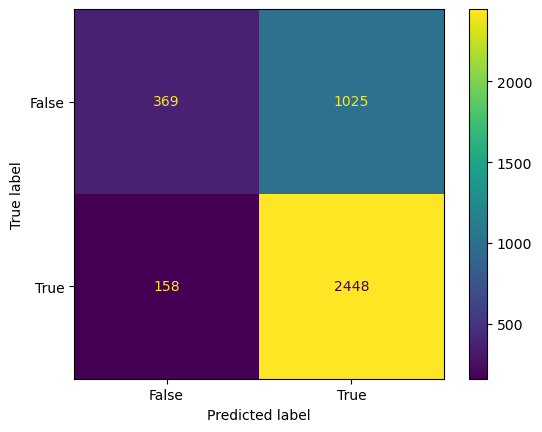

In [109]:
cm = confusion_matrix(y_test, yhat_grid, labels = GS_CV_RF.best_estimator_.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = GS_CV_RF.best_estimator_.classes_
                              )
disp.plot()
plt.savefig('CM_rf_grid_model.png')
#plt.show()

# Report

In [9]:
import time 
#importing the time library 

In [10]:
start = time.time()
#the current time

# Drop first category of categorical variables
df_dummify = pd.get_dummies(df, drop_first = True)

# Split df_dummify into X and y
X, y = df_dummify.iloc[:,:-1], df_dummify.loc[:,'dry_eye_disease_Y']

# Split X and y into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 30) 
    
RF_Best = RandomForestClassifier(random_state = 2000, oob_score = True, max_samples = 0.667, max_depth = 4).fit(X_train, y_train)

yhat = RF_Best.predict(X_test)

cv_rf = cross_validate(RF_Best, X_test, y_test, cv = 3,
              scoring = ('accuracy', 'recall', 'f1'))
              
# cross validate test set with metrics accuracy, recall and f1
accuracy_score = np.mean(cv_rf['test_accuracy'])
recall_score = np.mean(cv_rf['test_recall'])
f1_score = np.mean(cv_rf['test_f1'])

end = time.time()

In [11]:
print("THE PROCESS TOOK :",end - start)

THE PROCESS TOOK : 1.9305460453033447
